<a href="https://colab.research.google.com/github/SridharSeshadri56/Inventory-Models/blob/main/EoqModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EOQ Model

We will set up and solve the EOQ Model

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from termcolor import colored

Here we enter the parameters of the model. 

In [10]:
D = 1000.0 # Enter Annual Demand
H = 20.0   # Enter holding cost per unit per year
S = 100.0  # Enter ordering cost for placing one order
C = 10.0   # Cost of one item
StepSize = 10 # Step Size for order quantity
StartQ = 10 # Starting value of order quantit
EndQ   = 500 # Ending value of order quantity
EOQ = np.sqrt(2*D*S/H)
print(colored('Demand (D) is {}/year, holding cost (H) is ${} per unit per year'.format(D,H),color='blue'))
print('Ordering cost (S) is ${} per order and unit cost (C) is ${} per unit'.format(S,C))
print('Optimal order quantity = {:.1f}'.format(np.sqrt(2*D*S/H)))

Demand (D) is 1000.0/year, holding cost (H) is $20.0 per unit per year
Ordering cost (S) is $100.0 per order and unit cost (C) is $10.0 per unit
Optimal order quantity = 100.0


In [11]:
print(colored('Number of orders per year = {:.1f}'.format(D/EOQ), color='blue'))
print('Ordering cost per year = ${:.1f}'.format(D*S/EOQ))
print('Average inventory = {:.1f}'.format(EOQ/2))
print('Holding cost per year ${:.1f}'.format(H*EOQ/2))
print('Total Ordering and holding cost per year ${:.1f}'.format(np.sqrt(2*D*S*H)))

Number of orders per year = 10.0
Ordering cost per year = $1000.0
Average inventory = 50.0
Holding cost per year $1000.0
Total Ordering and holding cost per year $2000.0


We now plot how the ordering and holding costs change with order quntity

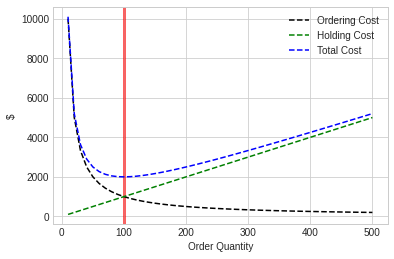

In [ ]:
fig = plt.figure()
ax = plt.axes()
numpoints = int((EndQ - StartQ)/StepSize+1)
x = np.linspace(StartQ, EndQ, numpoints)
plt.xlabel('Order Quantity')
plt.ylabel('$')
ax.plot(x, S*D/x, color = 'black', linestyle = 'dashed', label = 'Ordering Cost');
ax.plot(x, H*x/2, color = 'green', linestyle = 'dashed', label = 'Holding Cost');
ax.plot(x, S*D/x + H*x/2, color = 'blue', linestyle = 'dashed', label = 'Total Cost');
plt.legend()
plt.axvspan(EOQ-1, EOQ+1, color='red', alpha=0.5)